# Real Estate Price Predictor  

In [1]:
import pandas as pd

In [2]:
housing_df = pd.read_csv("data.csv")

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288609,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703376,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

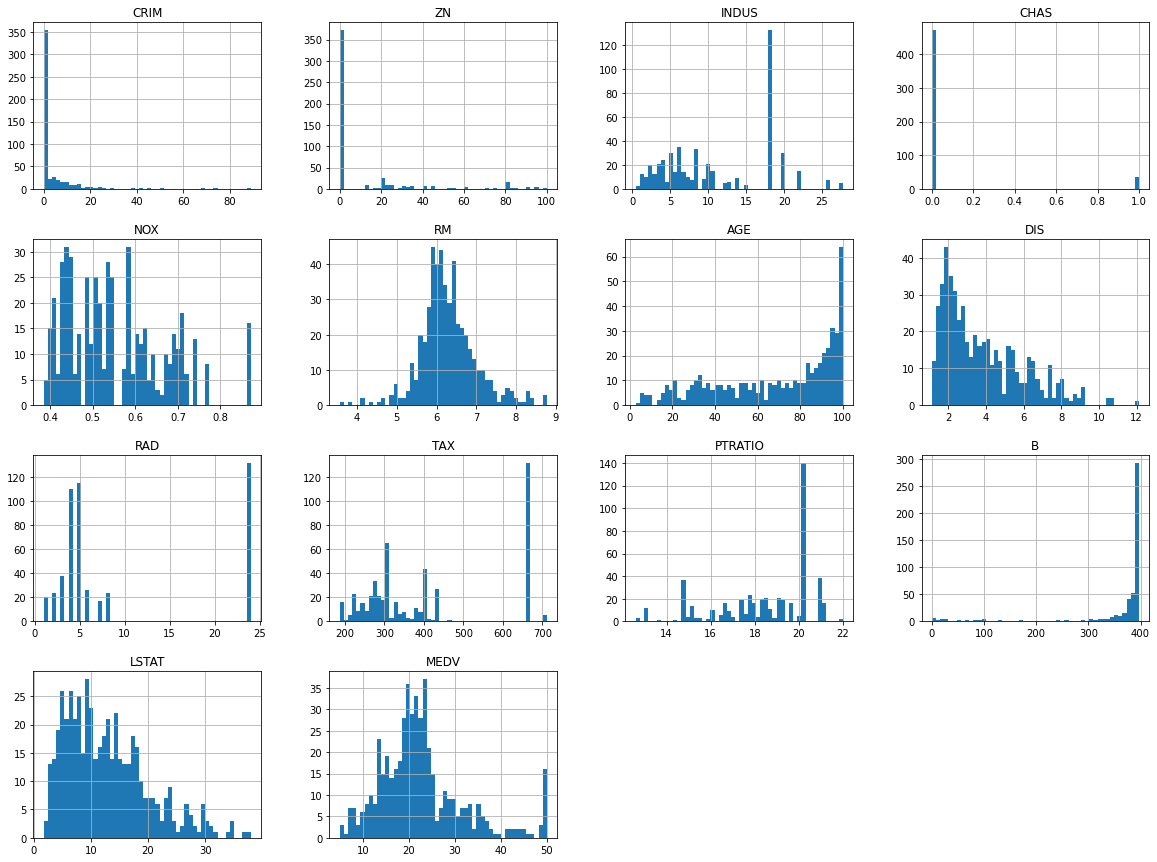

In [7]:
housing_df.hist(bins=50,figsize=(20,15))

## Train - Test - Splitting

In [8]:
# Another way of train, test, split the data 

import numpy as np
# def train_test_split(data,test_ratio):
#     np.random.seed(42)
#     shuffeled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffeled[:test_set_size]
#     train_indices = shuffeled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
# train_set, test_set = train_test_split(housing_df,0.2)

In [10]:
# print(f"Train set rows: {len(train_set)}\n Test set rows: {len(test_set)}\n")

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_df,test_size = 0.2, random_state = 42)
print(f"Train set rows: {len(train_set)}\nTest set rows: {len(test_set)}\n")

Train set rows: 404
Test set rows: 102



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1, test_size = 0.2, random_state=42)
for train_index,test_index in split.split(housing_df,housing_df['CHAS']):
    strat_train_index = housing_df.loc[train_index]
    strat_test_index = housing_df.loc[test_index]

In [13]:
strat_train_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [14]:
strat_test_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [15]:
housing_df = strat_train_index.copy()

## Looking for correlations

In [16]:
corr_matrix = housing_df.corr()

In [17]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.679879
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

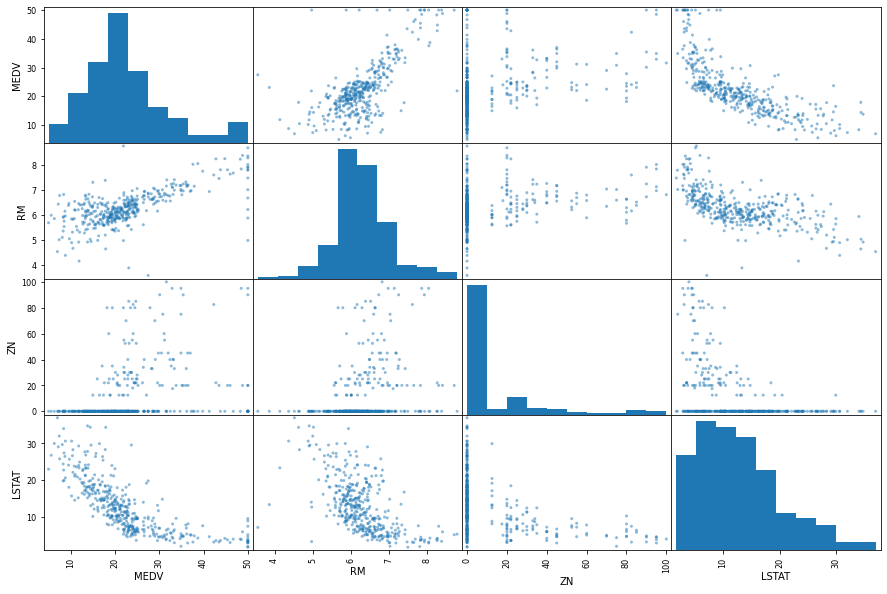

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing_df[attributes],figsize=(15,10))

### The above figure gives us insights into the correlations between the datapoints. As you can see the MEDV which is our label with respect to RM whose correlation is high, the scatterplot is going upwards.
### Also the LSTAT is showing interesting negative correlation with respect to MEDV.

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

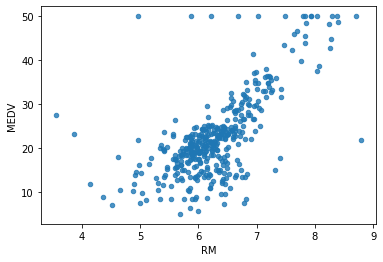

In [19]:
housing_df.plot(kind = "scatter",x="RM",y="MEDV",alpha = 0.8)

### Trying to create new attributes.

In [20]:
housing_df["Tax_per_Room"] = housing_df["TAX"]/housing_df["RM"]

In [21]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Tax_per_Room
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing_df.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV            1.000000
RM              0.679879
B               0.361761
ZN              0.339741
DIS             0.240451
CHAS            0.205066
AGE            -0.364596
RAD            -0.374693
CRIM           -0.393715
NOX            -0.422873
TAX            -0.456657
INDUS          -0.473516
PTRATIO        -0.493534
Tax_per_Room   -0.525363
LSTAT          -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='Tax_per_Room', ylabel='MEDV'>

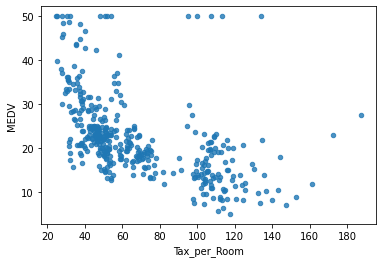

In [23]:
housing_df.plot(kind = "scatter",x="Tax_per_Room",y="MEDV",alpha = 0.8)

In [24]:
housing_df = strat_train_index.drop("MEDV",axis = 1)
housing_labels = strat_train_index["MEDV"].copy()


### Let's deal with Missing Attributes

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing_df)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [27]:
x = imputer.transform(housing_df)

In [28]:
new_housing = pd.DataFrame(x,columns=housing_df.columns)
new_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [29]:
new_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283302,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709869,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Feature Scaling

Types of Scaling Methods:
1. Min-Max Scaling (Normalization):
    (Value - Min) / (Max - Min)........... Values will be in the same scale and values will lie between 0 to 1.
    sklearn provides a class called MinMaxScaler for this method
2. Standardization 
    (Value - Mean) / (Standard Deviation)
    The result's variance becomes 1
    sklearn provides a class called Standard Scaler for this.

## Creating Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [31]:
pipeline_numpy_array = my_pipeline.fit_transform(housing_df)

In [32]:
pipeline_numpy_array.shape

(404, 13)

## Selecting a desired model for the Real Estate Predictor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor()
model.fit(pipeline_numpy_array,housing_labels)

RandomForestRegressor()

## Checking the predictions

In [34]:
sample_data = housing_df.iloc[:5]
sample_labels = housing_labels.iloc[:5]

In [35]:
prepared_data = my_pipeline.transform(sample_data)

In [36]:
model.predict(prepared_data)

array([22.357, 25.3  , 16.322, 23.225, 23.426])

In [37]:
list(sample_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## As you can compare the labels and our predictions we can clearly see that our model has been overfitted. So let's use cross validation technique for better evaluation.

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,pipeline_numpy_array,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [39]:
rmse_scores

array([2.82719902, 2.87588765, 4.28434621, 2.42013662, 3.29333285,
       2.59867373, 4.8012268 , 3.35535606, 3.24215655, 2.94300325])

In [40]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [41]:
print_scores(rmse_scores)

Scores:  [2.82719902 2.87588765 4.28434621 2.42013662 3.29333285 2.59867373
 4.8012268  3.35535606 3.24215655 2.94300325]
Mean:  3.264131874179836
Standard Deviation:  0.708031467176434


# Saving the Model.

In [42]:
from joblib import dump, load
dump(model, 'real_estate.joblib') 

['real_estate.joblib']

## Testing the model.

In [43]:
x_test = strat_test_index.drop("MEDV",axis=1)
y_test = strat_test_index["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mean_squared_error = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mean_squared_error)

In [44]:
final_rmse

2.9769636870673515

In [45]:
print(final_predictions,list(y_test))

[24.281 11.799 25.693 21.603 18.851 14.688 19.81  14.586 32.685 42.751
 19.364 12.152 24.823 28.818 19.482 10.866 31.896 14.342 23.684 18.247
 19.693 17.597 18.067 21.846 18.866 31.214 16.053 32.776  9.004 33.791
 23.491 21.456 23.09  11.122 21.325 11.014 44.719 24.473 23.383 42.04
 23.929 30.013 20.192 20.755 19.3   33.42  44.104 20.477 20.711 21.891
 21.429 14.616 20.955 14.875 24.875 33.193 42.484 28.637 19.286 22.242
 47.07   9.863 18.948 25.557 15.126 33.382 19.919 18.172 17.886 33.731
 26.216 23.046 21.327 22.418 34.649 13.    15.685 19.847 21.058 21.369
 22.896 20.846 13.833 24.067 20.766 21.354 14.359 21.376 22.332 23.208
 18.559 26.869  6.955 27.012 19.275 29.913 20.521 30.943 14.57  27.425
 21.565 20.603] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [46]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24725596, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49605505, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.283076  ,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.1307466 , -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04047733, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [47]:
model = load('real_estate.joblib')
features = np.array([prepared_data[0]])
model.predict(features)

array([22.357])